In [4]:
import pandas as pd

# Load the datasets
stops_df = pd.read_csv('transit-gtfs-stops.csv')
routes_df = pd.read_csv('transit-gtfs-routes.csv')
driveways_df = pd.read_csv('driveways.csv')
oct_usage_df = pd.read_csv('transit_data_oct.csv')



In [5]:
# Aggregate data to find total number of trips per route for October
trips_per_route = oct_usage_df.groupby('Route').size().reset_index(name='Total Trips')

# Sort the data by total trips in ascending order to see the least used routes
trips_per_route_sorted = trips_per_route.sort_values(by='Total Trips')

trips_per_route_sorted.head()


,Route,Total Trips
14,17,1710
6,8,2295
10,13,3616
11,14,4777
7,10,11683


In [6]:
from datetime import datetime

# Mapping for class corrections
class_mapping = {
    'CHILD': 'Child',
    'Child': 'Child',
    'QUEENS': 'Student',
    'ST LAWRENCE': 'Student',
    'Student': 'Student',
    'YOUTH': 'Youth',
    'Youth': 'Youth'
}

# Apply the mapping to correct class typos
oct_usage_df['Class'] = oct_usage_df['Class'].replace(class_mapping)

# Convert 'Time' column to datetime to extract hour for categorization
# Note: The year 1900 is used in 'Time' column, so we're only interested in the time component
oct_usage_df['Time'] = pd.to_datetime(oct_usage_df['Time']).dt.time

# Define the function to categorize time
def categorize_time(time):
    hour = datetime.strptime(str(time), '%H:%M:%S').hour
    if hour < 12:
        return 'Morning'
    elif 12 <= hour < 15:
        return 'Noon'
    elif 15 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour:
        return 'Night'

# Apply the categorization function to the 'Time' column
oct_usage_df['Time of Day'] = oct_usage_df['Time'].apply(categorize_time)

oct_usage_df.head()


,Date,Time,Class,Operation,Bus,Route,Latitude,Longitude,Time of Day
0,2017-10-01,01:43:03,Student,Exact Fare,620,17,44.227860,-76.496938,Morning
1,2017-10-01,01:43:08,Student,Exact Fare,620,17,44.227860,-76.496938,Morning
2,2017-10-01,01:58:13,ADULT,Pass (Multi-ride card),620,17,44.232035,-76.491397,Morning
3,2017-10-01,01:58:25,Student,Exact Fare,620,17,44.232035,-76.491397,Morning
4,2017-10-01,01:58:27,Student,Exact Fare,620,17,44.232035,-76.491397,Morning


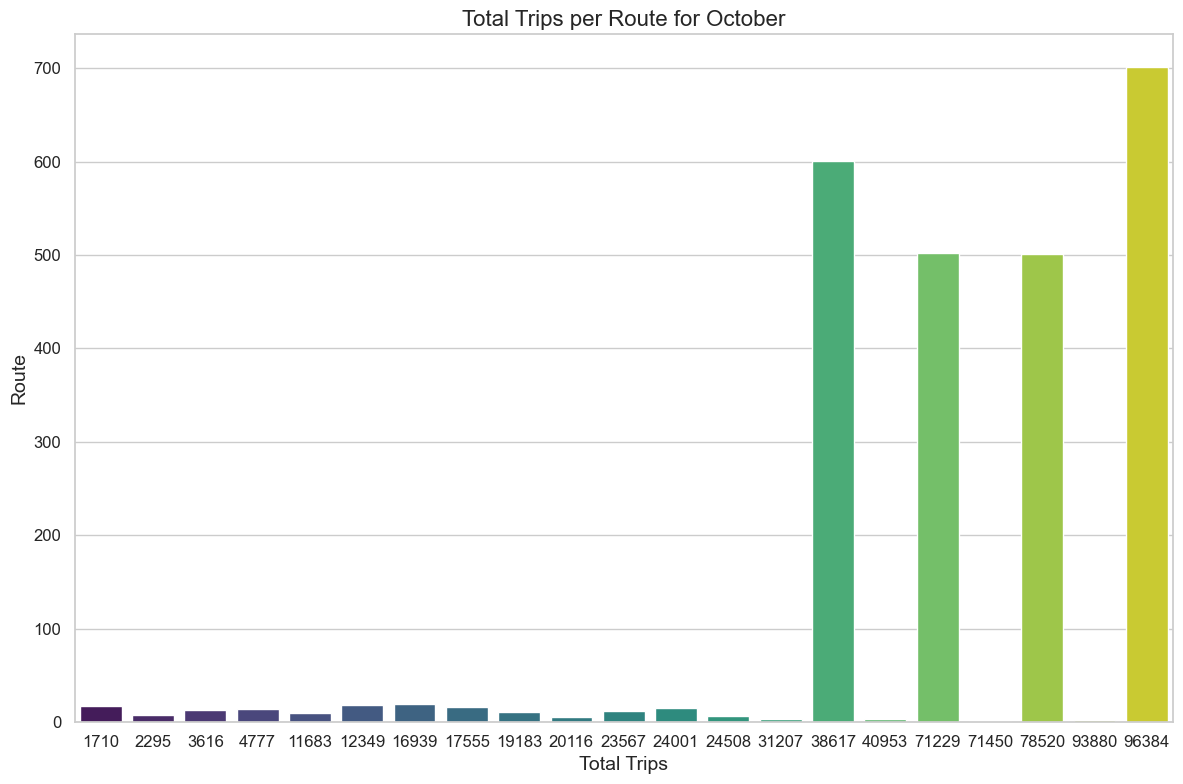

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Step 1: Usage Analysis - Total Trips per Route Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Trips', y='Route', data=trips_per_route_sorted, palette='viridis')
plt.title('Total Trips per Route for October', fontsize=16)
plt.xlabel('Total Trips', fontsize=14)
plt.ylabel('Route', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


/var/folders/49/199vrwcn1zqb7rx4rgy0xhbr0000gn/T/ipykernel_18365/3152448628.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  time_of_day_pivot = time_of_day_aggregated.pivot("Route", "Time of Day", "Total Trips").fillna(0)


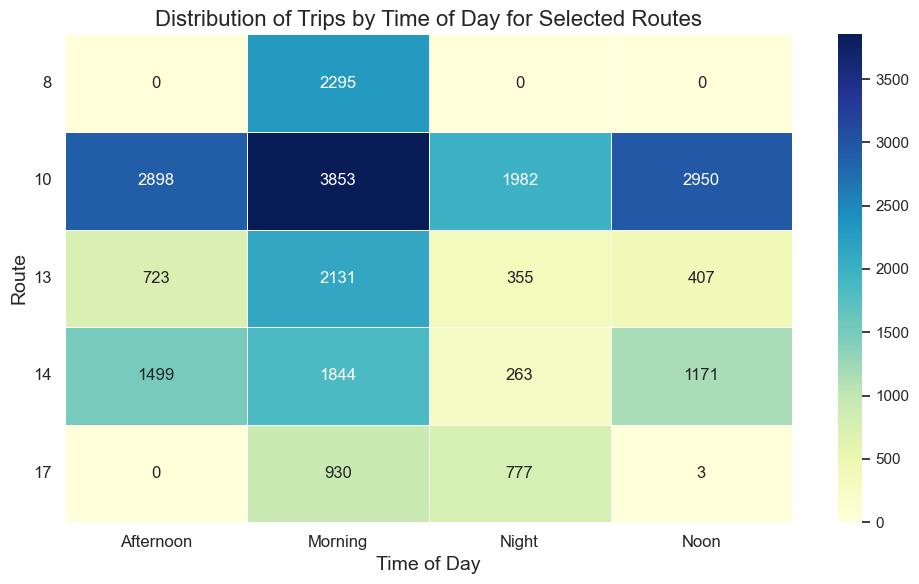

In [8]:
# Filter out the routes with the lowest ridership for detailed time of day analysis
routes_to_analyze = trips_per_route_sorted.head()['Route'].tolist()
time_of_day_analysis_df = oct_usage_df[oct_usage_df['Route'].isin(routes_to_analyze)]

# Aggregate data by Route and Time of Day
time_of_day_aggregated = time_of_day_analysis_df.groupby(['Route', 'Time of Day']).size().reset_index(name='Total Trips')

# Pivot the data for visualization
time_of_day_pivot = time_of_day_aggregated.pivot("Route", "Time of Day", "Total Trips").fillna(0)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(time_of_day_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Distribution of Trips by Time of Day for Selected Routes', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Route', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

plt.show()


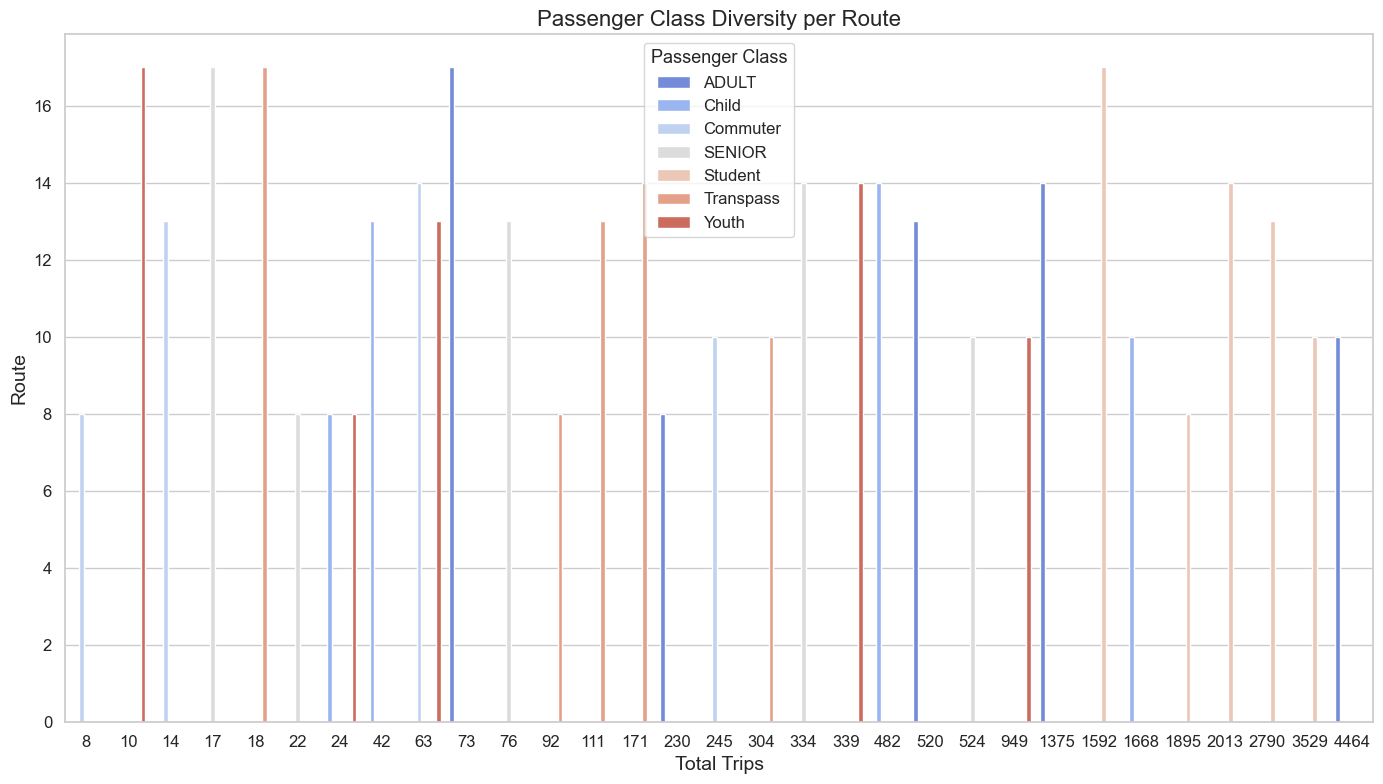

In [9]:
# Aggregate data by Route and Class
class_diversity_aggregated = time_of_day_analysis_df.groupby(['Route', 'Class']).size().reset_index(name='Total Trips')

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Trips', y='Route', hue='Class', data=class_diversity_aggregated, palette='coolwarm')
plt.title('Passenger Class Diversity per Route', fontsize=16)
plt.xlabel('Total Trips', fontsize=14)
plt.ylabel('Route', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Passenger Class', fontsize=12, title_fontsize='13')
plt.tight_layout()

plt.show()


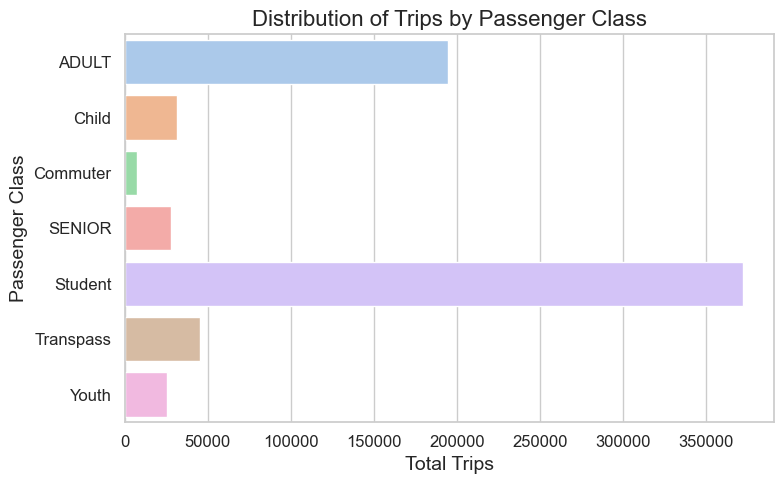

In [15]:
# Aggregate data by Passenger Class
class_distribution = oct_usage_df.groupby('Class').size().reset_index(name='Total Trips')

# Visualize the distribution of trips among different passenger classes
plt.figure(figsize=(8, 5))
sns.barplot(x='Total Trips', y='Class', data=class_distribution, palette='pastel')
plt.title('Distribution of Trips by Passenger Class', fontsize=16)
plt.xlabel('Total Trips', fontsize=14)
plt.ylabel('Passenger Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


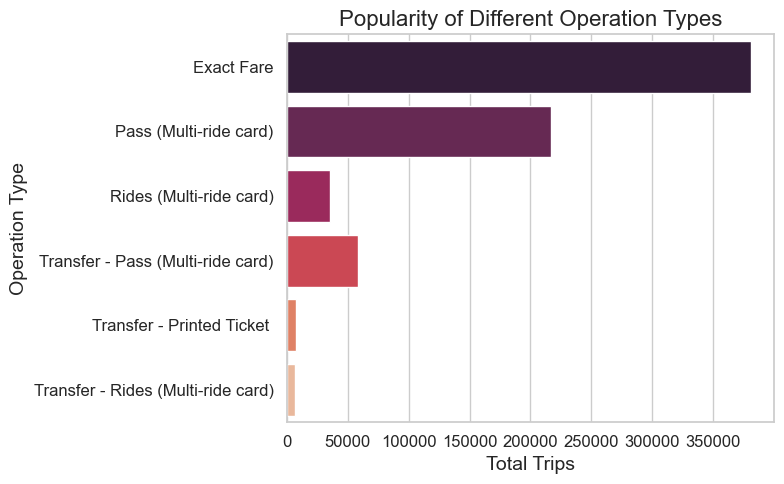

In [16]:
# Aggregate data by Operation type
operation_distribution = oct_usage_df.groupby('Operation').size().reset_index(name='Total Trips')

# Visualize the popularity of different operation types
plt.figure(figsize=(8, 5))
sns.barplot(x='Total Trips', y='Operation', data=operation_distribution, palette='rocket')
plt.title('Popularity of Different Operation Types', fontsize=16)
plt.xlabel('Total Trips', fontsize=14)
plt.ylabel('Operation Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


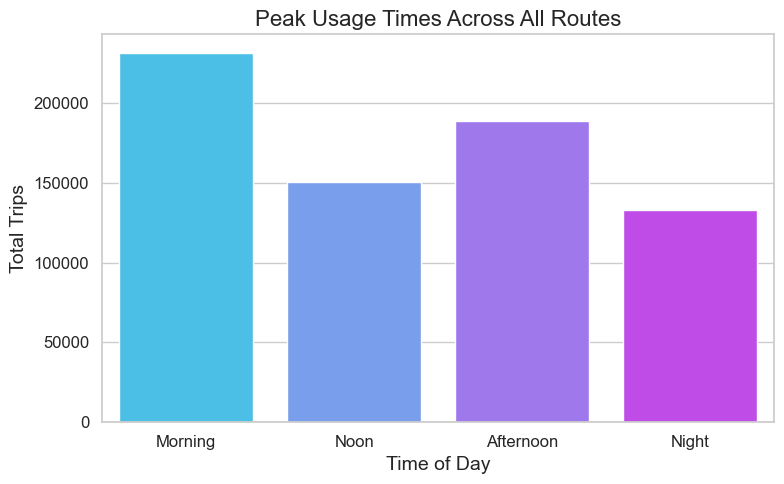

In [17]:
# Aggregate data by Time of Day
time_of_day_distribution = oct_usage_df.groupby('Time of Day').size().reset_index(name='Total Trips')

# Sort the data by a custom order to ensure the time of day is logically ordered
time_of_day_order = ['Morning', 'Noon', 'Afternoon', 'Night']
time_of_day_distribution['Time of Day'] = pd.Categorical(time_of_day_distribution['Time of Day'], categories=time_of_day_order, ordered=True)
time_of_day_distribution = time_of_day_distribution.sort_values('Time of Day')

# Visualize peak usage times across all routes
plt.figure(figsize=(8, 5))
sns.barplot(x='Time of Day', y='Total Trips', data=time_of_day_distribution, palette='cool')
plt.title('Peak Usage Times Across All Routes', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Total Trips', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()
